<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из Банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.


## Подготовка данных

In [1]:
import pandas as pd # импорт библиотек
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
try:    
    data = pd.read_csv('/datasets/Churn.csv') # присвоим имя файлу
except:
    data = pd.read_csv('C:/Users/Елена/Downloads/Churn.csv')

In [3]:
data.shape # посмотрим его размер

(10000, 14)

In [4]:
data.info() # изучим информацию о содержимом в файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.head() # изучим первые пять строк файла

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Мы видим, что у нас пропуски в одном столбце с информацией по количеству лет, сколько человек является клиентом банка. Их надо будет заполнить, пропуски будут мешать нашей модели обучаться. Также есть столбцы с типом object, что будет мешать в последующем обучать модель. И еще нам для обучения вряд ли понадобятся фамилии и id клиентов, поэтому смело их удалим.

In [6]:
data = data.drop(['Surname','CustomerId'], axis=1)

In [7]:
data = data.drop(['RowNumber'], axis=1)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [9]:
data.loc[data['Tenure'].isnull()] 
# посмотрим на строки с пропущенным значением в столбце Tenure

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [10]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median()) # заполним пропуски медианой

In [11]:
data['Tenure'].isnull().sum() # проверка

0

In [12]:
data = pd.get_dummies(data, drop_first=True) # убираем категориальные значения

In [13]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
features=data.drop('Exited', axis=1) # отбираем признаки и целевой признак
target=data['Exited']

In [15]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.20,random_state=45678)
# делим признаки на обучающую и валидационную выборки

In [16]:
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, test_size=0.25, random_state=45678)

In [17]:
features_train.shape, target_train.shape, features_valid.shape, target_valid.shape, features_test.shape, target_test.shape
# проверяем объемы

((6000, 11), (6000,), (2000, 11), (2000,), (2000, 11), (2000,))

Далее проведем масштабирование признаков, тк в данных очень большой разброс.

In [18]:
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
# отбор названий колонок, которые будем масшабировать

In [19]:
scaler = StandardScaler() # стандартизируем признаки
scaler.fit(features_train[numeric])

StandardScaler()

In [20]:
features_train[numeric] = scaler.transform(features_train[numeric]) 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
# стандартизируем признаки

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [21]:
features_train.head() # проверяем 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4201,0.178886,0.684203,0.720568,1.357953,-0.901212,1,1,1.270953,1,0,0
2385,-0.285735,-1.140680,-0.364716,0.696972,-0.901212,0,0,0.733900,0,0,1
276,1.087477,2.220946,-0.726477,-1.231887,-0.901212,1,1,-1.543775,0,0,1
3848,-0.936204,0.203971,-0.364716,1.209518,-0.901212,0,0,-1.551068,1,0,1
9184,0.457658,1.644667,-0.364716,-1.231887,0.812119,1,0,-0.266508,0,1,0


In [22]:
target_train.head() # проверяем 

4201    0
2385    0
276     1
3848    0
9184    0
Name: Exited, dtype: int64

Кажется, все получилось. Можно переходить к обучению

## Исследование задачи

Обучим вначале без учета дисбаланса 3 модели - Дерево решений, Случайный лес и Логистическая регрессия

### Дерево решений

In [23]:
model = DecisionTreeClassifier(random_state=54865) # обучаем модель
model.fit(features_train,target_train)
prediction = model.predict(features_valid)
print('Матрица ошибок:\n',confusion_matrix(target_valid, prediction), 
'\nПолнота:', recall_score(target_valid, prediction),
'\nТочность:', precision_score(target_valid, prediction),
'\nF1-мера:', f1_score(target_valid, prediction))

Матрица ошибок:
 [[1411  244]
 [ 165  180]] 
Полнота: 0.5217391304347826 
Точность: 0.42452830188679247 
F1-мера: 0.4681404421326398


Модель достаточно часто ошибается, к сожалению - много ложноположительных и ложноотрицательных ответов.

Попробуем подобрать гиперпараметры

In [24]:
best_depth = 0  # обучаем модель с подбором гиперпараметров
best_f1 = 0
for depth in range(1,50):
    model = DecisionTreeClassifier(random_state=54865, max_depth=depth) 
    model.fit(features_train,target_train)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > best_f1:
        best_f1=f1
        best_depth=depth
print('F1 лучшей модели', best_f1, 'при глубине дерева' ,best_depth)
f1_DT_1 = best_f1

F1 лучшей модели 0.5579831932773109 при глубине дерева 7


In [25]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.6871535531327991

После подбора гиперпараметров значение F1 улучшилось. Уже радует)

### Случайный лес

In [26]:
model = RandomForestClassifier(random_state=45789, n_estimators=3) # обучаем модель
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
print('Матрица ошибок:\n',confusion_matrix(target_valid, prediction), 
'\nПолнота:', recall_score(target_valid, prediction),
'\nТочность:', precision_score(target_valid, prediction),
'\nF1-мера:', f1_score(target_valid, prediction))

Матрица ошибок:
 [[1494  161]
 [ 172  173]] 
Полнота: 0.5014492753623189 
Точность: 0.5179640718562875 
F1-мера: 0.5095729013254786


Матрица ошибок выглядит уже получше, чем у логистической регрессии. Подберем еще гиперпаметры

In [27]:
%%time 
best_depth = 0 # обучаем модель с подбором гиперпараметров
best_est = 0
best_f1 = 0
for est in range(1,40):
    for depth in range(1,20):
        model = RandomForestClassifier(random_state=45789, n_estimators=est,
                                      max_depth = depth)
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1 > best_f1:
            best_depth = depth
            best_est = est
            best_f1 = f1
print('F1 лучшей модели', best_f1, 'при глубине дерева', best_depth, 'и количестве деревьев', best_est)
f1_RF_1 = best_f1

F1 лучшей модели 0.6048109965635738 при глубине дерева 13 и количестве деревьев 33
Wall time: 1min 25s


In [28]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8498086606243705

И снова после подбора гиперпараметров значение F1 улучшилось.

### Логистическая регрессия

In [29]:
model = LogisticRegression(random_state = 45789, solver='liblinear')
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
print('Матрица ошибок:\n',confusion_matrix(target_valid, prediction), 
'\nПолнота:', recall_score(target_valid, prediction),
'\nТочность:', precision_score(target_valid, prediction),
'\nF1-мера:', f1_score(target_valid, prediction))
f1_LR_1 = f1_score(target_valid, prediction)

Матрица ошибок:
 [[1577   78]
 [ 257   88]] 
Полнота: 0.25507246376811593 
Точность: 0.5301204819277109 
F1-мера: 0.34442270058708413


In [30]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.7518717982398528

Печальные результаты показывает данная модель, хуже предыдущих. На несбалансированных данных лучшей моделью оказалась модель случайный лес при глубине дерева 13 и количестве деревьев 33

## Борьба с дисбалансом

### Взвешивание классов

In [31]:
target.value_counts(normalize=True) # изучение насколько сбалансированны у нас классы

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Text(0, 0.5, 'Количество')

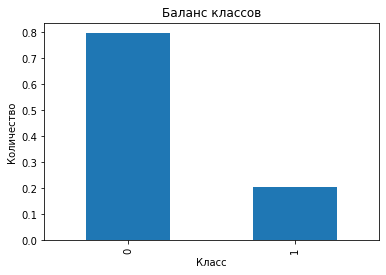

In [32]:
target.value_counts(normalize=True).plot(kind='bar')
plt.title('Баланс классов')
plt.xlabel('Класс')
plt.ylabel('Количество')

In [33]:
model = LogisticRegression(random_state = 45789, solver='liblinear', 
                           class_weight = 'balanced')
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
print('Матрица ошибок:\n',confusion_matrix(target_valid, prediction), 
'\nПолнота:', recall_score(target_valid, prediction),
'\nТочность:', precision_score(target_valid, prediction),
'\nF1-мера:', f1_score(target_valid, prediction))
f1_LR_2 = f1_score(target_valid, prediction)

Матрица ошибок:
 [[1177  478]
 [ 114  231]] 
Полнота: 0.6695652173913044 
Точность: 0.32581100141043723 
F1-мера: 0.4383301707779886


При применении параметра с балансировкой класса данная модель улучшилась, но не сильно.

0.7543605236656595

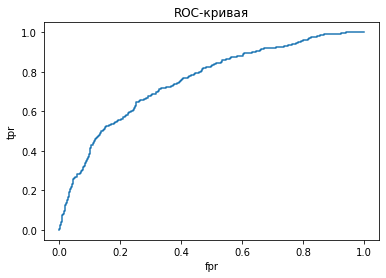

In [34]:
probabilities_valid = model.predict_proba(features_valid) 
probabilities_one_valid = probabilities_valid[:,1]
fpr, tpr, theresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

In [35]:
best_depth = 0  # обучаем модель с подбором гиперпараметров
best_f1 = 0
for depth in range(1,50):
    model = DecisionTreeClassifier(random_state=54865, max_depth=depth, class_weight='balanced') 
    model.fit(features_train,target_train)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > best_f1:
        best_f1=f1
        best_depth=depth
print('F1 лучшей модели', best_f1, 'при глубине дерева' ,best_depth)
f1_DT_2 = best_f1

F1 лучшей модели 0.5365321701199564 при глубине дерева 7


0.7045492359560401

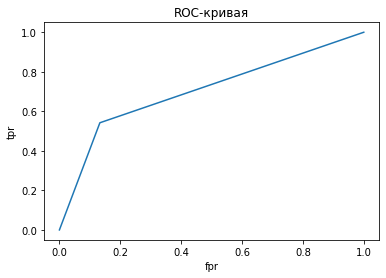

In [36]:
probabilities_valid = model.predict_proba(features_valid) 
probabilities_one_valid = probabilities_valid[:,1]
fpr, tpr, theresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

In [37]:
%%time 
best_depth = 0 # обучаем модель с подбором гиперпараметров
best_est = 0
best_f1 = 0
for est in range(1,40):
    for depth in range(1,20):
        model = RandomForestClassifier(random_state=45789, n_estimators=est,
                                      max_depth = depth, class_weight='balanced')
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1 > best_f1:
            best_depth = depth
            best_est = est
            best_f1 = f1
print('F1 лучшей модели', best_f1, 'при глубине дерева', best_depth, 'и количестве деревьев', best_est)
f1_RF_2 = best_f1

F1 лучшей модели 0.6100278551532033 при глубине дерева 11 и количестве деревьев 28
Wall time: 1min 19s


0.8622820613862253

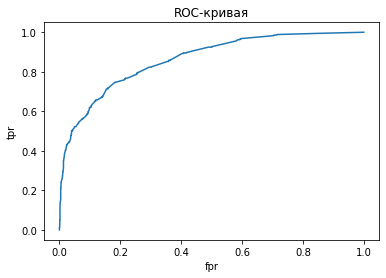

In [38]:
probabilities_valid = model.predict_proba(features_valid) 
probabilities_one_valid = probabilities_valid[:,1]
fpr, tpr, theresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

Стратегия взвешивания классов несильно улучшила качество моделей, а дерево решений даже слегка ухудшила:
у Логистической регрессии метрика F1 до и после 0,344 и 0,438, соответственно, 
у Дерева Решений - 0,557 и 0,536
у Случайного леса - 0,605 и 0,610

### Увеличение выборки

In [39]:
def upsample(features, target, repeat): # увеличим выборку
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    features_upsampled = pd.concat([features_zero] + [features_one]*repeat)
    target_upsampled = pd.concat([target_zero] + [target_one]*repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, 
                                    target_upsampled, random_state=45789)
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [40]:
features_upsampled.shape, target_upsampled.shape, target_upsampled.value_counts()
# посмотрим какой теперь объем у нашых данных

((8558, 11),
 (8558,),
 0    4721
 1    3837
 Name: Exited, dtype: int64)

#### Логистическая регрессия

In [41]:
model = LogisticRegression(random_state = 45789, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
prediction = model.predict(features_valid)
print('F1-мера:', f1_score(target_valid, prediction))
f1_LR_3 = f1_score(target_valid, prediction)

F1-мера: 0.44111349036402575


0.754003240071807

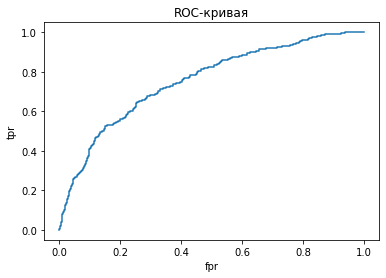

In [42]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
fpr, tpr, theresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

#### Дерево решений

In [43]:
best_depth = 0 
best_f1 = 0
for depth in range(1,50):
    model = DecisionTreeClassifier(random_state=54865, max_depth=depth) 
    model.fit(features_upsampled,target_upsampled)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > best_f1:
        best_f1=f1
        best_depth=depth
print('F1 лучшей модели', best_f1, 'при глубине дерева' ,best_depth)
f1_DT_3 = best_f1

F1 лучшей модели 0.552132701421801 при глубине дерева 7


0.6986339156705635

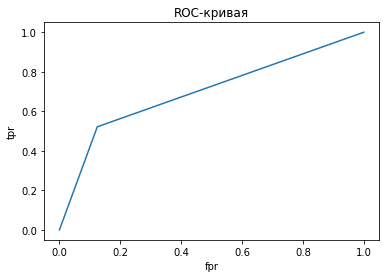

In [44]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
fpr, tpr, theresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

#### Случайный лес

In [45]:
%%time
best_depth = 0
best_est = 0
best_f1 = 0
for est in range(1,40):
    for depth in range(1,20):
        model = RandomForestClassifier(random_state=45789, n_estimators=est,
                                      max_depth = depth)
        model.fit(features_upsampled,target_upsampled)
        prediction = model.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1 > best_f1:
            best_depth = depth
            best_est = est
            best_f1 = f1
print('F1 лучшей модели', best_f1, 'при глубине дерева' ,best_depth, 'и количестве деревьев', best_est)
f1_RF_3 = best_f1

F1 лучшей модели 0.6048387096774193 при глубине дерева 12 и количестве деревьев 35
Wall time: 1min 42s


0.8454748456587416

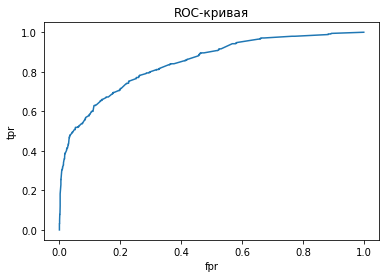

In [46]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
fpr, tpr, theresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

После увеличения выборки наилучшей моделью оказалась (с точки зрения показателя F1 и auc_roc) модель Случайный лес при глубине дерева 12 и количестве деревьев 35.

### Уменьшение выборки

In [47]:
def downsample(features, target, fraction): # уменьшим выборку
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target ==0]
    target_one = target[target == 1]
    
    features_downsampled = pd.concat([features_zero.sample(frac=fraction,
        random_state=45789)] + [features_one])
    target_downsampled = pd.concat([target_zero.sample(frac=fraction,
        random_state=45789)] + [target_one])
    features_downsampled, target_downsampled = shuffle(features_downsampled, 
        target_downsampled, random_state = 45789)
    return features_downsampled, target_downsampled 
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)
features_downsampled.shape, #### Дерево решений.shape, target_downsampled.value_counts()

((2695, 11),)

#### Логистическая регрессия

In [48]:
model = LogisticRegression(random_state = 45789, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
prediction = model.predict(features_valid)
print('F1-мера:', f1_score(target_valid, prediction))
f1_LR_4 = f1_score(target_valid, prediction)

F1-мера: 0.4448818897637795


0.7523499277551557

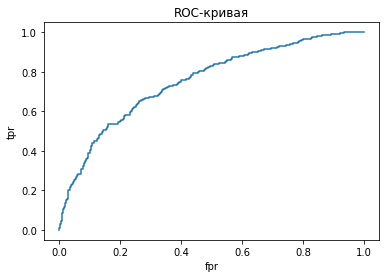

In [49]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
fpr, tpr, theresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

#### Дерево решений

In [50]:
best_depth = 0 
best_f1 = 0
for depth in range(1,50):
    model = DecisionTreeClassifier(random_state=54865, max_depth=depth) 
    model.fit(features_downsampled,target_downsampled)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > best_f1:
        best_f1=f1
        best_depth=depth
print('F1 лучшей модели', best_f1, 'при глубине дерева' ,best_depth)
f1_DT_4 = best_f1

F1 лучшей модели 0.5635103926096998 при глубине дерева 5


0.6999737291475109

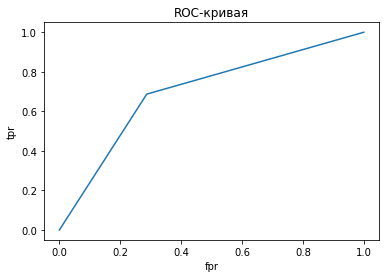

In [51]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
fpr, tpr, theresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

#### Случайный лес

In [52]:
%%time
best_depth = 0
best_est = 0
best_f1 = 0
for est in range(1,40):
    for depth in range(1,20):
        model = RandomForestClassifier(random_state=45789, n_estimators=est,
                                      max_depth = depth)
        model.fit(features_downsampled,target_downsampled)
        prediction = model.predict(features_valid)
        f1 = f1_score(target_valid, prediction)
        if f1 > best_f1:
            best_depth = depth
            best_est = est
            best_f1 = f1
print('F1 лучшей модели', best_f1, 'при глубине дерева' ,best_depth, 'и количестве деревьев', best_est)
f1_RF_4 = best_f1

F1 лучшей модели 0.5765765765765766 при глубине дерева 8 и количестве деревьев 34
Wall time: 52.6 s


0.8497228425062394

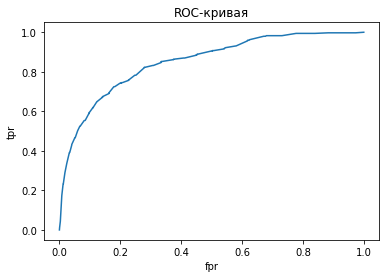

In [53]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
fpr, tpr, theresholds = roc_curve(target_valid, probabilities_one_valid)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

При уменьшении выборки модели тоже хорошо себя показали, лучшей все так же осталась модель Случайный лес. Но значение f1 чуть лучше у нее при увеличении выборки. На этом и остановимся.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Нужно сделать раздел с промежуточными выводами.
    
Давай посмотрим на структуру проекта. Ты провела 10 экспериментов ( 1 + 3 + 3 + 3) с разными моделями и разными стратегиями борьбы с дисбалансом. Теперь нужно описать результат: какой алгоритм борьбы с дибалансом, с какой моделью и какими гиперпараметрами мы выбираем по оценкам на валидационном наборе?  
    
Я видел,что ты писала короткие пояснения, но для читателя, просматривающего твой проект "по диагонали" нужно сразу показать "суть", а это закономерный результат 50% усилий по проекту.
</div>

In [54]:
f1_LR = [f1_LR_1, f1_LR_2, f1_LR_3, f1_LR_4]
f1_DT = [f1_DT_1,f1_DT_2,f1_DT_3,f1_DT_4]
f1_RF = [f1_RF_1,f1_RF_2,f1_RF_3,f1_RF_4]

compare = {'LogisticRegression': f1_LR, 'DecisionTree': f1_DT, 'RandomForest':f1_RF }

compare_df = pd.DataFrame(compare, index=['Unbalanced','Balanced','Upsample','Downsample'])
compare_df

,LogisticRegression,DecisionTree,RandomForest
Unbalanced,0.344423,0.557983,0.604811
Balanced,0.438330,0.536532,0.610028
Upsample,0.441113,0.552133,0.604839
Downsample,0.444882,0.563510,0.576577


Подведем итоги нашей работы. Были проведены 12 экспериментов по обучению моделей на тестовых выборках и проверках их на валидационных данных. 
При обучении на тестовых данных до балансировки модели показывали не самые лучшие результаты, если судить по метрике f1. Так, у LG она была 0,344, у DT и RF 0,557 и 0,604, соответственно.
После проведения процедуры взвешивания классов качество всех моделей улучшилось, у LG до 0,438, у DT - 0,536, RF - 0,61.
Далее мы попробовали справиться с дисбалансом в наших данных - провели увеличение выборки. В таком случае наши модели показали - LG 0,441, у DT - 0,550, RF - 0,605. RF при подборе гиперпараметров (глубина - 28, кол-во деревьев 11) показала столько же, как и на несбалансированных данных при глубине - 13, кол-ве деревьев - 33).
Следующим методом борьбы с дисбалансом у нас было уменьшение выборки. При таком варианте у нас получились следующие результаты: LG - 0,448, у DT - 0,56, RF - 0,5765.


## Тестирование модели

После подбора моделей в предыдущих пунктах лучшей себя проявила модель Случайный лес с количеством деревьев 35, глубиной дерева 12. На ней и проведем финальное тестирование и посмотрим на результат f1.

In [55]:
model = RandomForestClassifier(random_state=45789, n_estimators=35,
                                      max_depth = 12)
model.fit(features_upsampled,target_upsampled)
prediction = model.predict(features_test)
f1_score(target_test, prediction)

0.6404761904761905

0.860336175737797

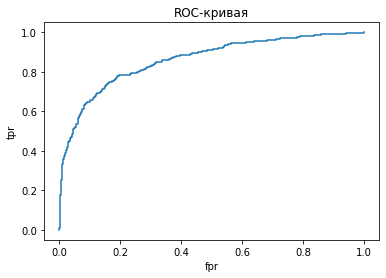

In [56]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:,1]
fpr, tpr, theresholds = roc_curve(target_test, probabilities_one_test)
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('fpr')
plt.ylabel('tpr')
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

Данная модель показала хорошее значение f1 и очень высокое значение auc-roc, что говорит о хорошем качестве нашей модели. Конечно, она еще не идеальна, но уже может начать предсказывать уйдет клиент из банка или нет.